<h1><center>Analysis of new media on stock returns</center><h1>

## Project Team – Group 13
- Vidur  Puliani          A0198492L
- Lei Xiaowen             A0198449H
- Donal Ngo Jin Ze        A0198487A
- Wilson Lum Kok Keong    A0198478A
<br><br>

# Word Cloud & Topic Modelling Analysis

1. Read in
Reuter datasets
2. Preprocess with stopwords
3. Wordcloud Analysis
4. Create Vectorizer & WordCloud for Unigram, Bigram and Trigram
5. Create LDA Model
6. pyLDAvis Display
7. Save Model and output of Topics

## Import Library

In [1]:
from wordcloud import WordCloud
import pandas as pd
import re
from pathlib import Path
import os
import json

import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
sns.set_style('whitegrid')
%matplotlib inline
import matplotlib.colors as mcolors

### Define Variables

In [2]:
# Tweak the two parameters below
number_topics = 3
number_words = 30

## 1. Reading in the Reuter News dataset

In [5]:
REUTER_DIR     = Path('data scrapping/ReutersNews')

def GetAllReuterNews():
    file = os.listdir(REUTER_DIR)
    Reuter_df = pd.DataFrame()
    for filename in os.listdir(REUTER_DIR):
        with open(REUTER_DIR / filename) as json_file:
            data = json.load(json_file)
            df = pd.DataFrame(data['news_items'])
            df = df[["headline"]]
        Reuter_df = pd.concat([Reuter_df,df])
    return Reuter_df

In [6]:
#Read the excel file from worksheet
Reuter_news = GetAllReuterNews()

In [7]:
Reuter_news

headline
0   Samsung to unveil square-shaped foldable phone...
1   U.S. appeals court denies Apple bid for rehear...
2   U.S. appeals court denies Apple bid for rehear...
3   Apple's main iPhone maker Foxconn to resume so...
4   Apple iPhone maker Foxconn approved to resume ...
5   Apple iPhone maker Foxconn approved to resume ...
6   China's Shenzhen denies blocking Apple supplie...
7   Apple to delay reopening of retail stores in C...
8   BRIEF-Apple Says Working Toward Re-Opening Cor...
9   BRIEF-French consumer regulatory body fines Ap...
10  Free trials boost Spotify subscribers at cost ...
11  Exclusive: iPhone app makers questioned in U.S...
12  Goldman in talks with Amazon to offer small bu...
13  Apple supplier Wistron to assemble key iPhone ...
14  Apple to close all China mainland stores due t...
15  Apple to shut down all official stores in Chin...
16  Apple supplier Japan Display gets $920 million...
17  LG Display looks to a more positive 2020 on OL...
18  SK Hynix Q4 profit tumbles 95%, hit by prolong...
19  Apple supplier LG Display posts fourth quarter...
20         Apple redesigns mapping app for U.S. users
21  EU lawmakers, with eye on Apple, call for comm...
22  CalTech wins $1.1 billion jury verdict in pate...
23  US STOCKS SNAPSHOT-S&P 500 fades to end lower ...
24  US STOCKS-Apple, Boeing lift Wall Street as Fe...
25  US STOCKS-Apple, Boeing lift Wall Street ahead...
26  Apple's iPhone strength is back and analysts s...
27  US STOCKS-Wall St edges higher on Apple, Boein...
28  US STOCKS SNAPSHOT-Apple, Boeing bolster Wall ...
29  US STOCKS-Futures gain as Apple earnings take ...
..                                                ...
29  Tesla touts safeguards as senator urges compan...
30  Tesla's German factory gets off to an explosiv...
31  Tesla overtakes Volkswagen as world's second m...
32  Michigan, Tesla settle suit over direct vehicl...
33  Tesla's furious rally pushes market value past...
34      Tesla races past $100 bln in market valuation
35  Tesla crosses $100 billion stock market valuat...
36  Michigan, Tesla reach agreement for direct car...
37  Michigan, Tesla reach agreement for direct car...
38  Tesla moves a step closer to opening first Eur...
0   Twitter notches first $1 billion quarterly rev...
1   Twitter tops expectations with first $1 bln qu...
2   'Giga Texas?' Musk asks Twitter users to vote ...
3   IN BRIEF: Twitter hires ex-EFF attorney who re...
4   Microsoft, Twitter, others urge 4th Circuit to...
5   'Boneheads' no more? Fed's rate cuts appear to...
6   Twitter plans to build 'decentralized standard...
7   Twitter plans to build a "decentralized standa...
8   Calif. appeals court shoots down class cert bi...
9   U.S. solar industry urges Twitter campaign to ...
10  U.S. solar industry urges Twitter campaign to ...
11  Twitter makes global changes to comply with pr...
12  Former Twitter worker accused of spying for Sa...
13  Twitter tightens bans on political ads and cau...
14  U.S. accuses two former Twitter employees of s...
15  Two former Twitter employees accused of spying...
16                   Musk to go off Twitter ... again
17  Facebook, Google, Twitter urged to do more to ...
18  Twitter ad platform suffers tech glitches, hit...
19  CORRECTED-UPDATE 3-Twitter ad platform suffers...

[2881 rows x 1 columns]

In [8]:
len(Reuter_news)

2881

## 2. Preprocess stopwords

In [9]:
stopword    = stopwords.words("English")
mystopwords = []

stopword.extend(mystopwords)

In [10]:
def topic_pre_process(text):
    # Remove all the special characters
    processed_text = re.sub(r'\W', ' ', str(text))
    # Substituting multiple spaces with single space
    processed_text= re.sub(r'\s+', ' ', processed_text, flags=re.I)
    # Substituting rows with only numbers with null
    processed_text = re.sub(r'[0-9]+', '', processed_text)
    processed_text = re.sub(r"\d", "", processed_text)
    processed_text = processed_text.lower()

    tokens = nltk.word_tokenize(processed_text)
    tokens=[ t for t in tokens if t not in stopword]
    text_after_process =" ".join(tokens)
    return(text_after_process)


In [11]:
Reuter_news['text'] = Reuter_news.headline.apply(topic_pre_process)

In [12]:
Reuter_news

headline  \
0   Samsung to unveil square-shaped foldable phone...   
1   U.S. appeals court denies Apple bid for rehear...   
2   U.S. appeals court denies Apple bid for rehear...   
3   Apple's main iPhone maker Foxconn to resume so...   
4   Apple iPhone maker Foxconn approved to resume ...   
5   Apple iPhone maker Foxconn approved to resume ...   
6   China's Shenzhen denies blocking Apple supplie...   
7   Apple to delay reopening of retail stores in C...   
8   BRIEF-Apple Says Working Toward Re-Opening Cor...   
9   BRIEF-French consumer regulatory body fines Ap...   
10  Free trials boost Spotify subscribers at cost ...   
11  Exclusive: iPhone app makers questioned in U.S...   
12  Goldman in talks with Amazon to offer small bu...   
13  Apple supplier Wistron to assemble key iPhone ...   
14  Apple to close all China mainland stores due t...   
15  Apple to shut down all official stores in Chin...   
16  Apple supplier Japan Display gets $920 million...   
17  LG Display looks to a more positive 2020 on OL...   
18  SK Hynix Q4 profit tumbles 95%, hit by prolong...   
19  Apple supplier LG Display posts fourth quarter...   
20         Apple redesigns mapping app for U.S. users   
21  EU lawmakers, with eye on Apple, call for comm...   
22  CalTech wins $1.1 billion jury verdict in pate...   
23  US STOCKS SNAPSHOT-S&P 500 fades to end lower ...   
24  US STOCKS-Apple, Boeing lift Wall Street as Fe...   
25  US STOCKS-Apple, Boeing lift Wall Street ahead...   
26  Apple's iPhone strength is back and analysts s...   
27  US STOCKS-Wall St edges higher on Apple, Boein...   
28  US STOCKS SNAPSHOT-Apple, Boeing bolster Wall ...   
29  US STOCKS-Futures gain as Apple earnings take ...   
..                                                ...   
29  Tesla touts safeguards as senator urges compan...   
30  Tesla's German factory gets off to an explosiv...   
31  Tesla overtakes Volkswagen as world's second m...   
32  Michigan, Tesla settle suit over direct vehicl...   
33  Tesla's furious rally pushes market value past...   
34      Tesla races past $100 bln in market valuation   
35  Tesla crosses $100 billion stock market valuat...   
36  Michigan, Tesla reach agreement for direct car...   
37  Michigan, Tesla reach agreement for direct car...   
38  Tesla moves a step closer to opening first Eur...   
0   Twitter notches first $1 billion quarterly rev...   
1   Twitter tops expectations with first $1 bln qu...   
2   'Giga Texas?' Musk asks Twitter users to vote ...   
3   IN BRIEF: Twitter hires ex-EFF attorney who re...   
4   Microsoft, Twitter, others urge 4th Circuit to...   
5   'Boneheads' no more? Fed's rate cuts appear to...   
6   Twitter plans to build 'decentralized standard...   
7   Twitter plans to build a "decentralized standa...   
8   Calif. appeals court shoots down class cert bi...   
9   U.S. solar industry urges Twitter campaign to ...   
10  U.S. solar industry urges Twitter campaign to ...   
11  Twitter makes global changes to comply with pr...   
12  Former Twitter worker accused of spying for Sa...   
13  Twitter tightens bans on political ads and cau...   
14  U.S. accuses two former Twitter employees of s...   
15  Two former Twitter employees accused of spying...   
16                   Musk to go off Twitter ... again   
17  Facebook, Google, Twitter urged to do more to ...   
18  Twitter ad platform suffers tech glitches, hit...   
19  CORRECTED-UPDATE 3-Twitter ad platform suffers...   

                                                 text  
0   samsung unveil square shaped foldable phones c...  
1   u appeals court denies apple bid rehearing vir...  
2   u appeals court denies apple bid rehearing vir...  
3   apple main iphone maker foxconn resume chinese...  
4   apple iphone maker foxconn approved resume she...  
5   apple iphone maker foxconn approved resume she...  
6   china shenzhen denies blocking apple supplier ...  
7           apple delay reopening retail stores china  
8   br

## 3. Word Cloud Anaysis

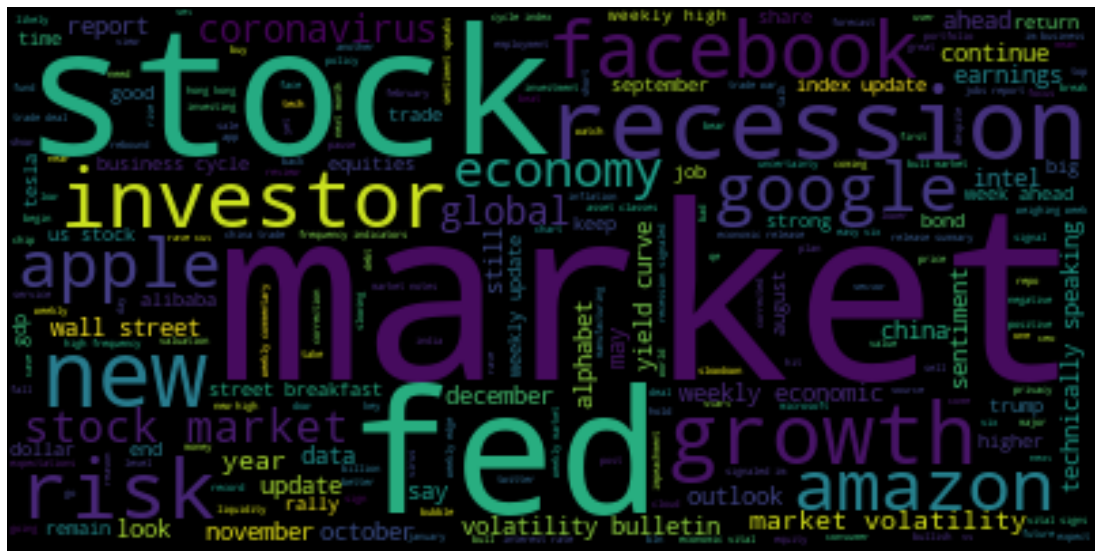

In [13]:
# Join the different processed titles together.
long_string = ','.join(list(Reuter_news.text.values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="black", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud

wordcloud.generate(long_string)
# Visualize the word cloud
#wordcloud.to_image()

plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Define Function

In [14]:
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer, name):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    fig = plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90,fontsize=16) 
    plt.xlabel('words',fontsize=18)
    plt.ylabel('counts',fontsize=18)
    plt.show()
    fig.savefig("Reuter_" + name +'.png')


# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

# Return the top 10 Topic 3 function
def Get_one_topic(model, count_vectorizer, n_top_words, topic_no):
    words = count_vectorizer.get_feature_names()
    topic2 =[]
    for topic_idx, topic in enumerate(model.components_):
        if topic_idx == topic_no:
            for i in topic.argsort()[:-n_top_words - 1:-1]:
                topic2.append(words[i])

    return topic2

# Return the top all Topics function
def Get_topic(model, count_vectorizer, n_top_words):
    words      = count_vectorizer.get_feature_names()
    all_topics = [ [0] * (len(words)) for _ in range(number_topics)]
    for topic_idx, topic in enumerate(model.components_): 
        fav_topic = []
        for i in topic.argsort()[:-n_top_words - 1:-1]:
            fav_topic.append(words[i])
            #all_topics[topic_idx][i] = words[i]
        all_topics[topic_idx] = fav_topic

    return all_topics

def Display_Topics(topics):
    cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

    cloud = WordCloud(stopwords=mystopwords,
                      background_color='white',
                      width=2500,
                      height=1800,
                      max_words=20,
                      colormap='tab10',
                      color_func=lambda *args, **kwargs: cols[i],
                      prefer_horizontal=1.0)

    fig, axes = plt.subplots(1, number_topics, figsize=(25,25), sharex=True, sharey=True)

    for i, ax in enumerate(axes.flatten()):
        fig.add_subplot(ax)
        topic_words = ','.join(list(topics[i])) 
        cloud.generate(topic_words)
        plt.gca().imshow(cloud)
        plt.gca().set_title('Topic ' + str(i+1), fontdict=dict(size=40))
        plt.gca().axis('off')


    plt.subplots_adjust(wspace=0, hspace=0)
    plt.axis('off')
    plt.margins(x=0, y=0)
    plt.tight_layout()
    plt.show()
    
def WordCloud_Display(count_vectorizer,count_data,name):
    count_vectorizer.vocabulary_
    sum_words = count_data.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in count_vectorizer.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    
    #Generating wordcloud and saving as jpg image
    words_dict = dict(words_freq)
    WC_height = 1000
    WC_width = 1500
    WC_max_words = 200
    wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width,stopwords=mystopwords)
    wordCloud.generate_from_frequencies(words_dict)

    plt.figure(figsize=(20,10))
    plt.title('Most frequently occurring ' + name + ' connected by same colour and font size')
    plt.imshow(wordCloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    wordCloud.to_file('WordCloud_Reuter_' + name + '.jpg')
    

## 4. Count Vectorizer WordCloud for Unigram, Bigram and Trigram

### Unigram bigram and trigram

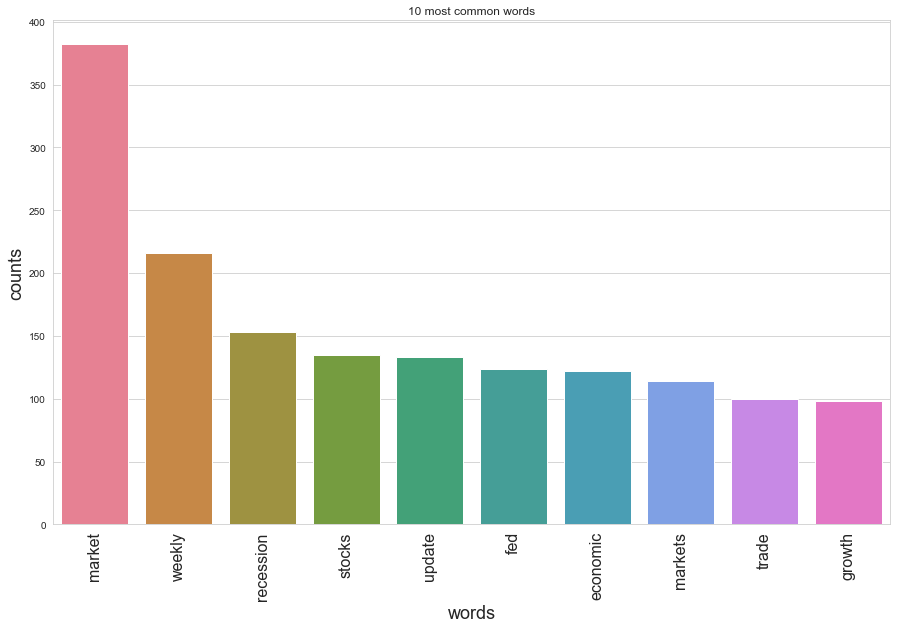

In [15]:
# Initialise the count vectorizer with the English stop words
count_vectorizer_Allgram = CountVectorizer(stop_words='english', ngram_range=(1,3))
# Fit and transform the processed titles
count_data_all = count_vectorizer_Allgram.fit_transform(Reuter_news.text)
# Visualise the 10 most common words
plot_10_most_common_words(count_data_all, count_vectorizer_Allgram, 'Reuter_uni_bi_trigram_word_count_BarChart_ALL_3')

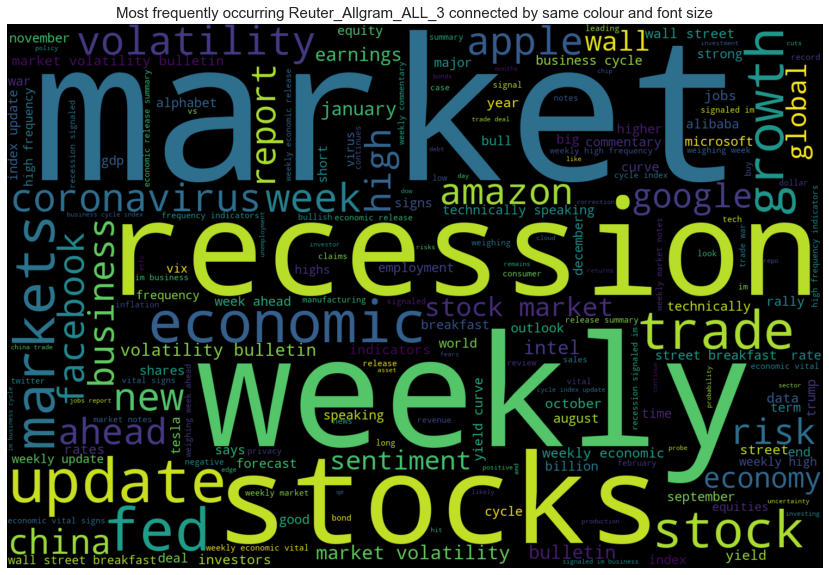

In [16]:
WordCloud_Display(count_vectorizer_Allgram,count_data_all,"Reuter_Allgram_ALL_3")

### unigram

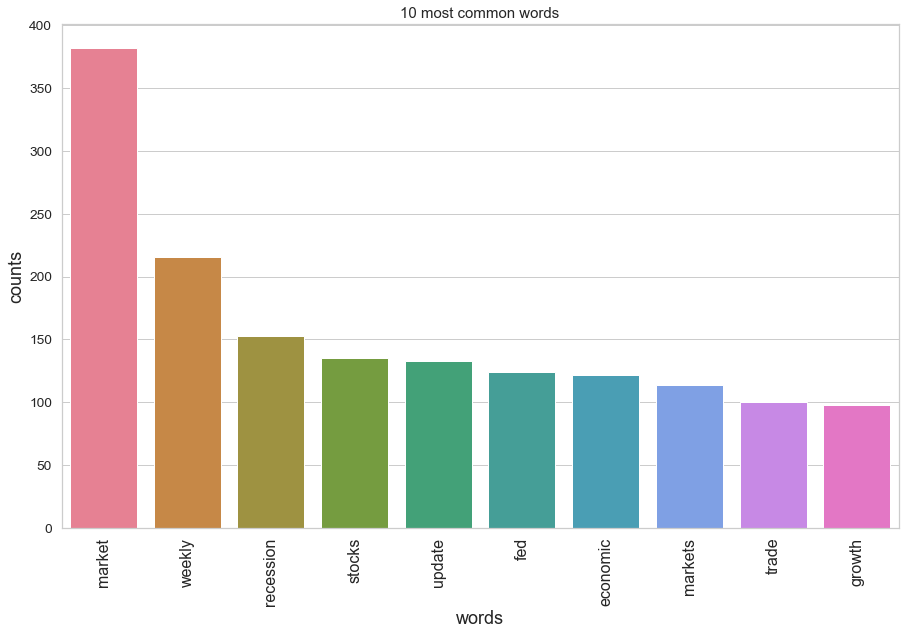

In [17]:
# Initialise the count vectorizer with the English stop words
count_vectorizer_Unigram = CountVectorizer(stop_words='english', ngram_range=(1,1))
# Fit and transform the processed titles
count_data_uni = count_vectorizer_Unigram.fit_transform(Reuter_news.text)
# Visualise the 10 most common words
plot_10_most_common_words(count_data_uni, count_vectorizer_Unigram, 'Reuter_unigram_word_count_BarChart_ALL_3')

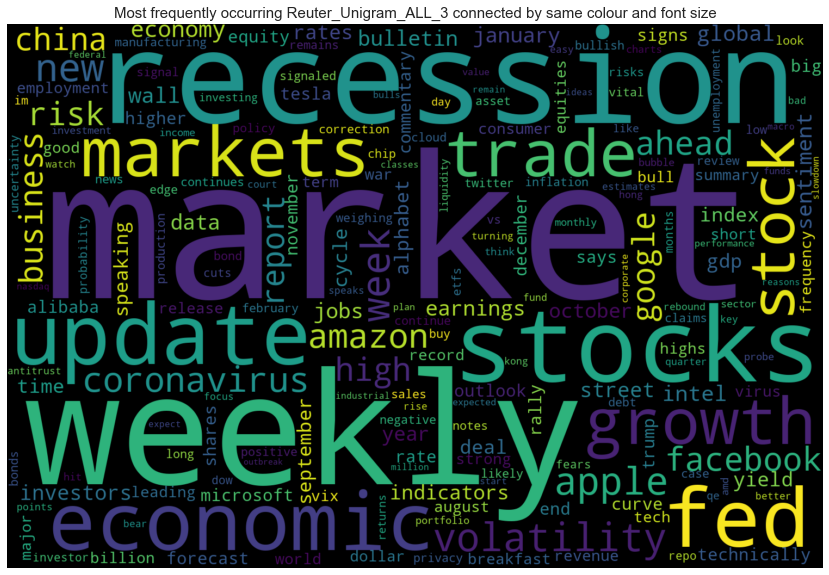

In [18]:
WordCloud_Display(count_vectorizer_Unigram,count_data_uni,"Reuter_Unigram_ALL_3")

### Bigram

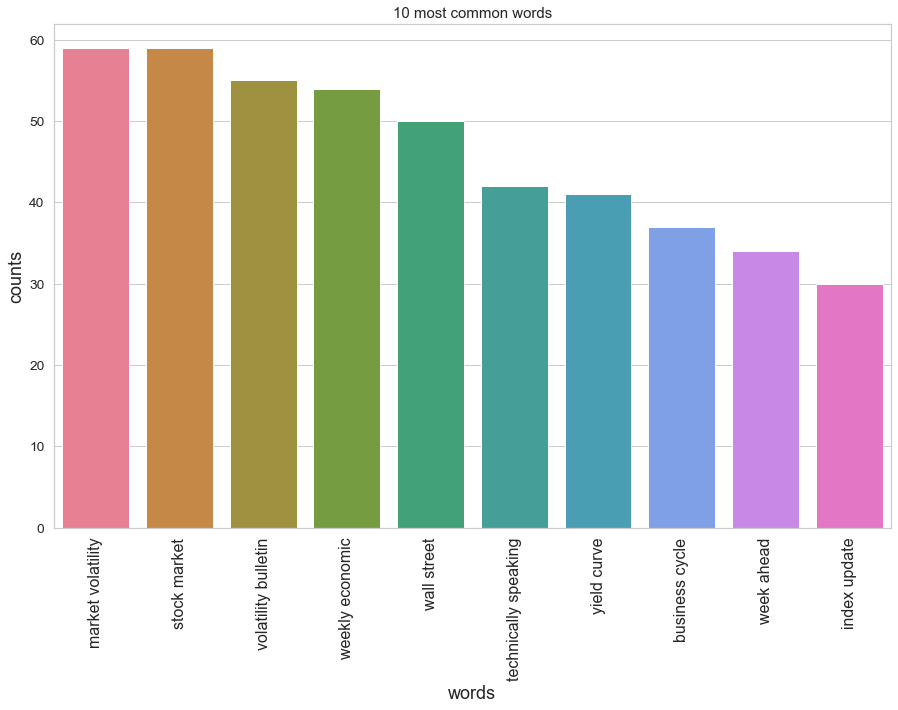

In [19]:
# Initialise the count vectorizer with the English stop words
count_vectorizer_Bigram = CountVectorizer(stop_words='english', ngram_range=(2,2))
# Fit and transform the processed titles
count_data_bi = count_vectorizer_Bigram.fit_transform(Reuter_news.text)
# Visualise the 10 most common words
plot_10_most_common_words(count_data_bi, count_vectorizer_Bigram, 'Reuter_Bigram_word_count_BarChart_ALL_3')

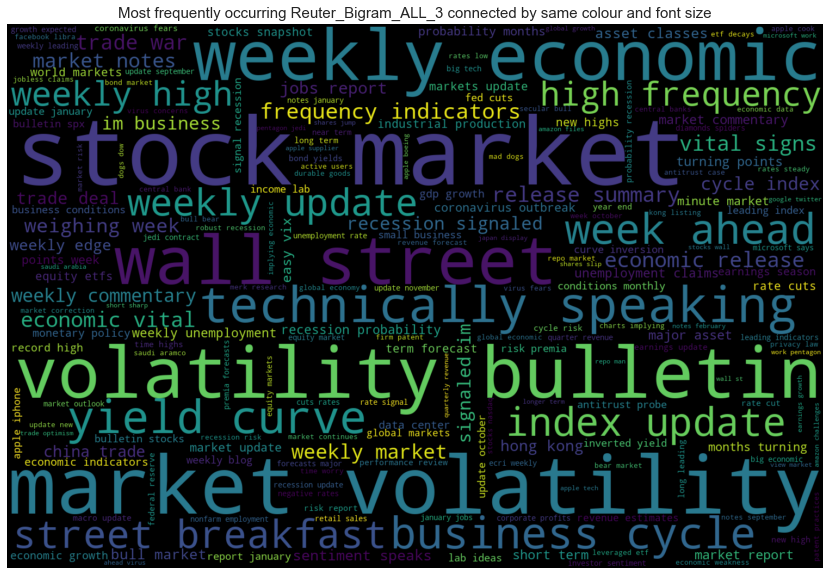

In [20]:
WordCloud_Display(count_vectorizer_Bigram,count_data_bi,"Reuter_Bigram_ALL_3")

### Trigram

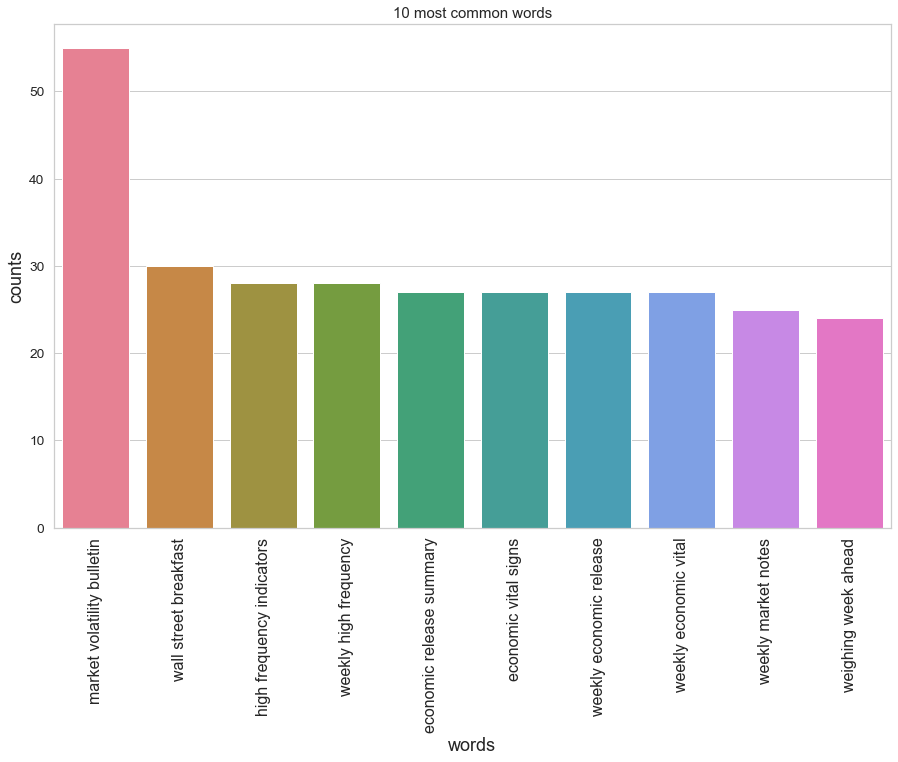

In [21]:
# Initialise the count vectorizer with the English stop words
count_vectorizer_Trigram = CountVectorizer(stop_words='english', ngram_range=(3,3))
# Fit and transform the processed titles
count_data_tri = count_vectorizer_Trigram.fit_transform(Reuter_news.text)
# Visualise the 10 most common words
plot_10_most_common_words(count_data_tri, count_vectorizer_Trigram, 'Reuter_Trigram_word_count_BarChart_ALL_3')

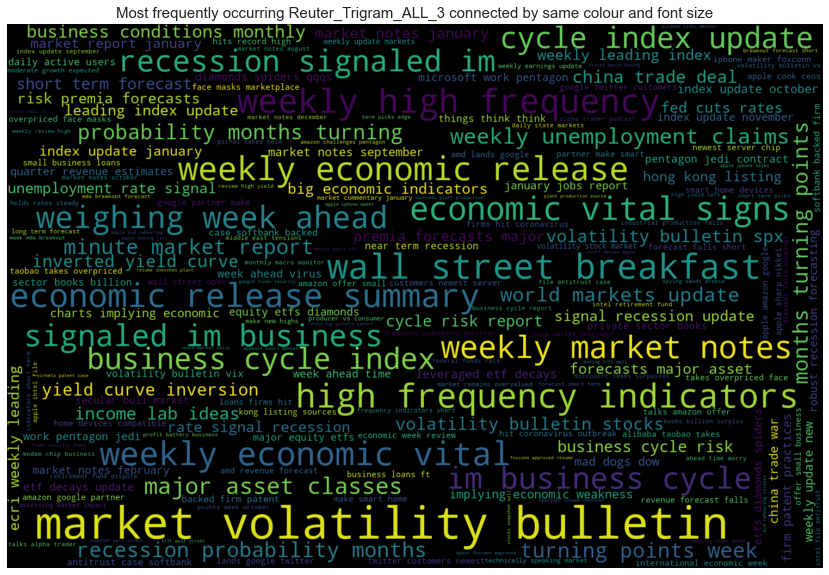

In [22]:
WordCloud_Display(count_vectorizer_Trigram,count_data_tri,"Reuter_Trigram_ALL_3")

## 5. Create LDA Model 

### Allgram output

In [23]:
# Create and fit the LDA model
lda_All = LDA(n_components=number_topics, n_jobs=-1)
lda_All.fit(count_data_all)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda_All, count_vectorizer_Allgram, number_words)

Topics found via LDA:

Topic #0:
market recession update markets weekly stocks yield stock curve yield curve volatility week global growth apple trade claims stock market bull fed coronavirus ahead investors facebook unemployment risk new vix market volatility bulletin bulletin

Topic #1:
market fed amazon recession stocks google growth high markets sentiment indicators weekly new volatility intel high frequency indicators frequency weekly high weekly high frequency high frequency frequency indicators report trade gdp alphabet facebook china microsoft shares market volatility

Topic #2:
market weekly economic update weekly economic business recession trade week jobs stocks cycle coronavirus ahead index fed apple business cycle economy risk january report october new year growth signs index update markets stock


### Unigram output

In [24]:
# Create and fit the LDA model
lda_uni = LDA(n_components=number_topics, n_jobs=-1)
lda_uni.fit(count_data_uni)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda_uni, count_vectorizer_Unigram, number_words)

Topics found via LDA:

Topic #0:
growth data intel economic ahead week speaking gdp technically amazon market markets global facebook recession year shares coronavirus alibaba strong stocks new economy record revenue risk chip cloud continue billion

Topic #1:
market volatility recession weekly stock bulletin january business apple update risk economic cycle october report fed week yield stocks september index commentary november time vix employment curve release summary major

Topic #2:
weekly trade update markets stocks fed high china new jobs coronavirus market sentiment google wall facebook indicators rates earnings signs street war short economy investors deal world economic rate frequency


### Bigram output

In [25]:
# Create and fit the LDA model
lda_bi = LDA(n_components=number_topics, n_jobs=-1)
lda_bi.fit(count_data_bi)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda_bi, count_vectorizer_Bigram, number_words)

Topics found via LDA:

Topic #0:
market volatility volatility bulletin technically speaking turning points market report recession probability unemployment claims weekly unemployment months turning probability months points week minute market weekly edge weekly update markets update world markets stock market hong kong jobs report trade deal bulletin spx market commentary macro update bulletin stocks small business industrial production antitrust probe leading index monetary policy microsoft says

Topic #1:
wall street street breakfast release summary economic release weekly economic yield curve trade war asset classes bull market weekly commentary technically speaking major asset weekly high high frequency frequency indicators risk premia conditions monthly business conditions income lab lab ideas stocks snapshot market update jobs report performance review long leading signal recession short term sentiment speaks equity etfs market commentary

Topic #2:
stock market business cycle we

### Trigram output

In [26]:
# Create and fit the LDA model
lda_tri = LDA(n_components=number_topics, n_jobs=-1)
lda_tri.fit(count_data_tri)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda_tri, count_vectorizer_Trigram, number_words)

Topics found via LDA:

Topic #0:
recession signaled im cycle index update im business cycle business cycle index signaled im business market volatility bulletin weekly unemployment claims weighing week ahead weekly economic vital economic vital signs economic release summary weekly economic release signal recession update rate signal recession unemployment rate signal ecri weekly leading weekly leading index leading index update high frequency indicators weekly high frequency wall street breakfast index update october index update january implying economic weakness charts implying economic volatility bulletin spx january jobs report index update november minute market report china trade war

Topic #1:
market volatility bulletin weekly market notes wall street breakfast weekly economic release economic release summary major asset classes high frequency indicators weekly high frequency minute market report weighing week ahead volatility bulletin stocks yield curve inversion premia foreca

## Get Topics

In [27]:
Allgram_topics = Get_topic(lda_All, count_vectorizer_Allgram, number_words)

In [28]:
Unigram_topics = Get_topic(lda_uni, count_vectorizer_Unigram, number_words)

In [29]:
Bigram_topics = Get_topic(lda_bi, count_vectorizer_Bigram, number_words)

In [30]:
Trigram_topics = Get_topic(lda_tri, count_vectorizer_Trigram, number_words)

## WordCloud in terms of Topics

### AllGgram

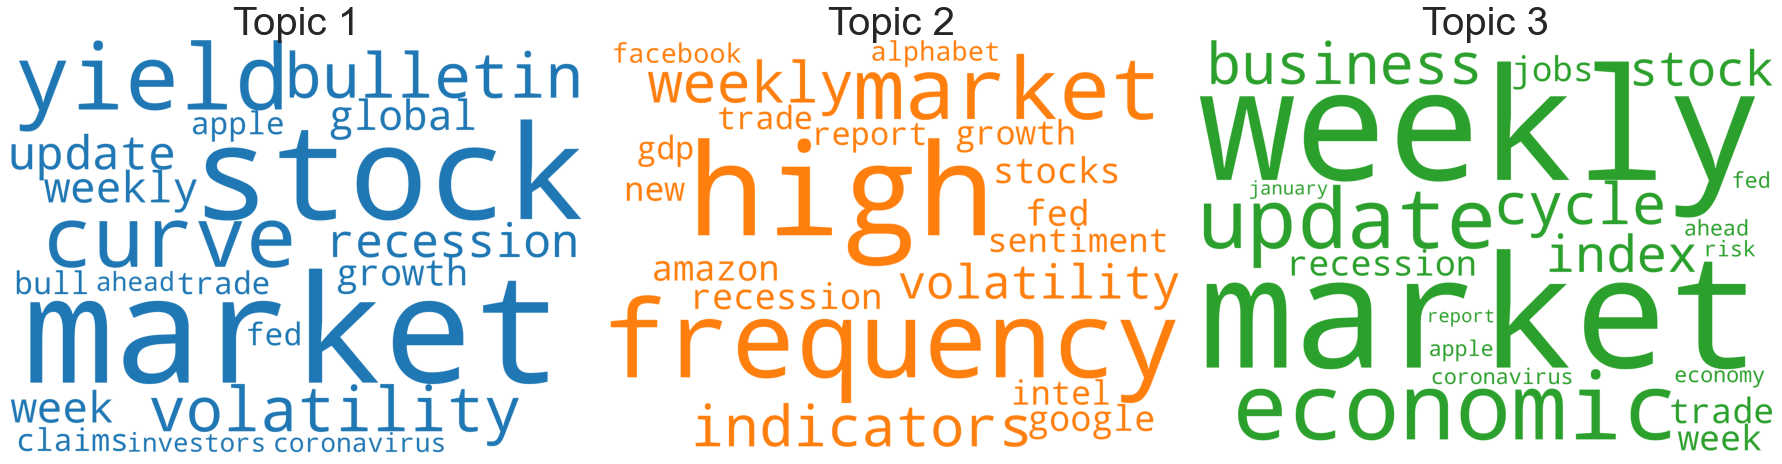

In [31]:
Display_Topics(Allgram_topics)

### Unigram

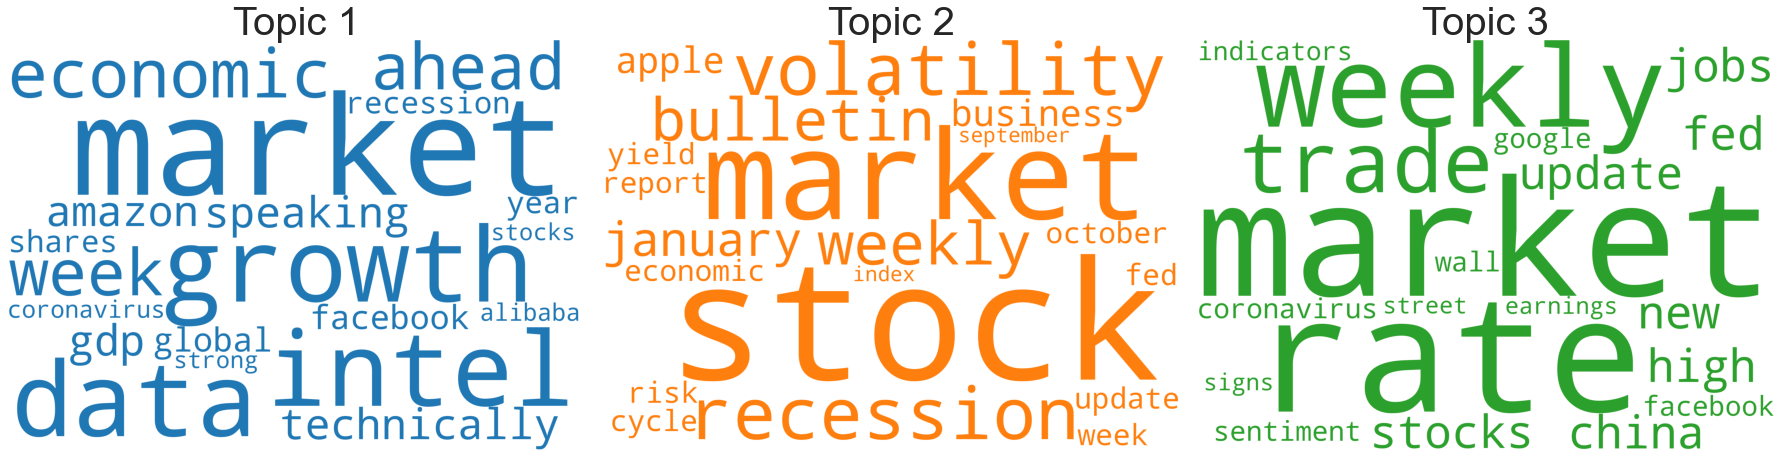

In [32]:
Display_Topics(Unigram_topics)

### Bigram

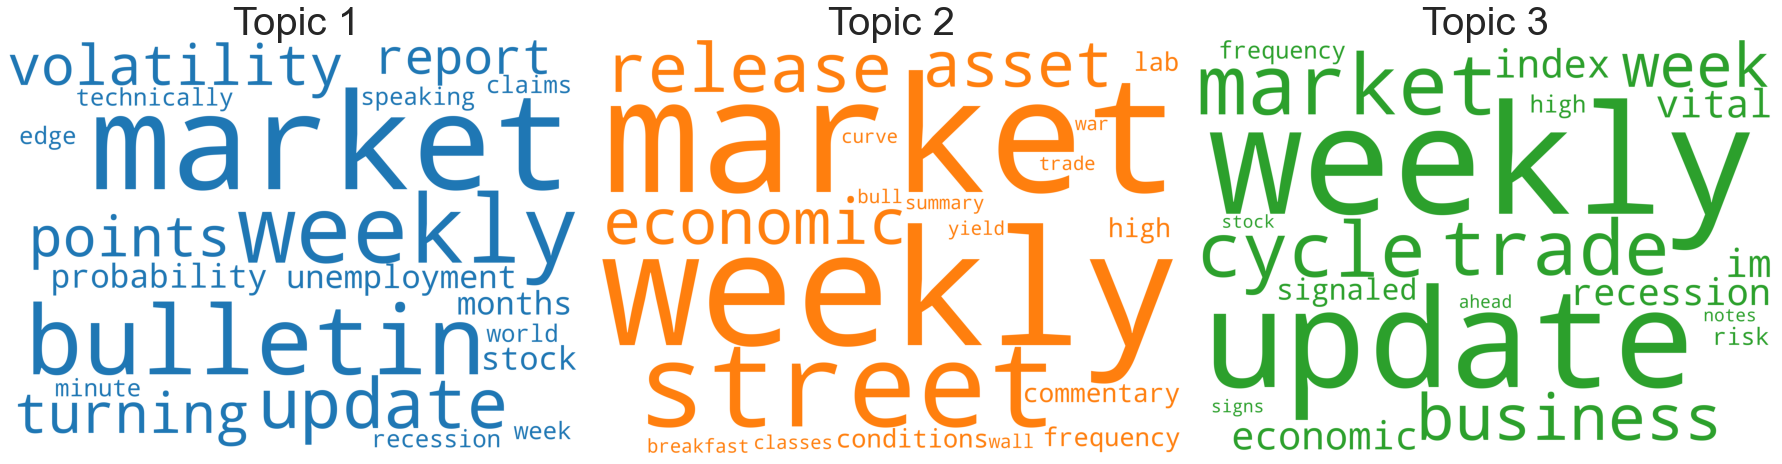

In [33]:
Display_Topics(Bigram_topics)

### Trigram

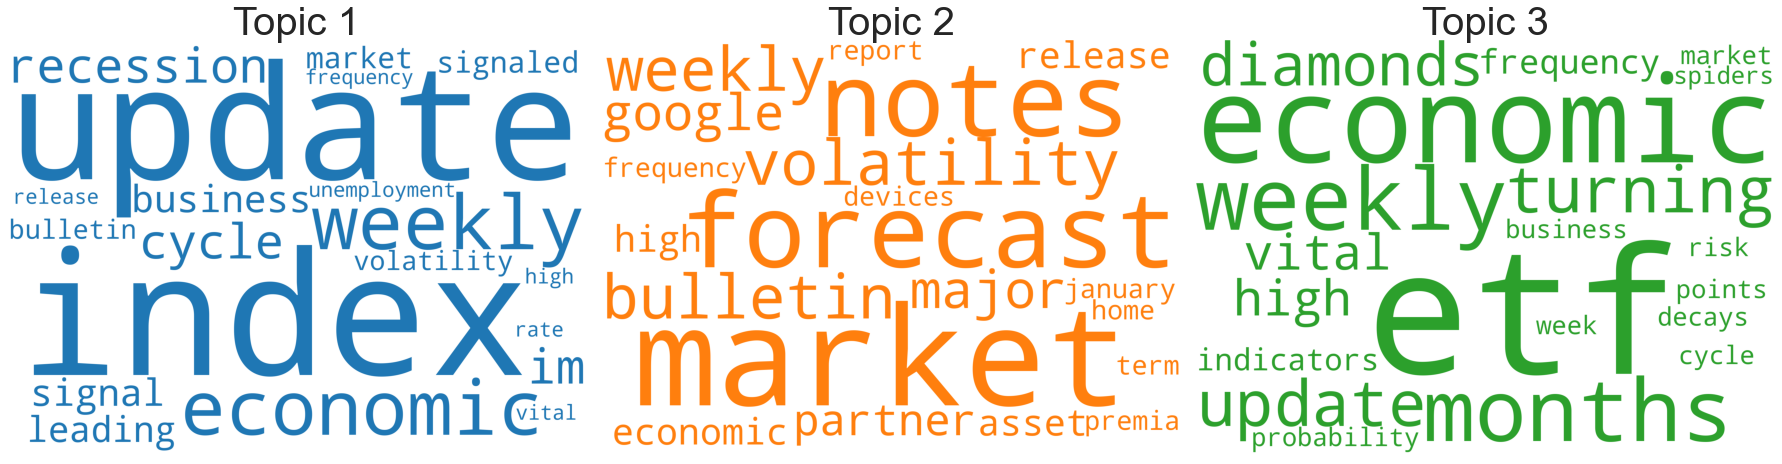

In [34]:
Display_Topics(Trigram_topics)

## 6. pyLDAvis Display

In [35]:
from pyLDAvis import sklearn as sklearn_lda
import pickle 
import pyLDAvis
LDAvis_data_filepath_all  = os.path.join('./ldavis_Reuter_all_news_ALL_'+str(number_topics))
LDAvis_data_filepath_uni  = os.path.join('./ldavis_Reuter_uni_news_ALL_'+str(number_topics))
LDAvis_data_filepath_bi   = os.path.join('./ldavis_Reuter_bi_news_ALL_'+str(number_topics))
LDAvis_data_filepath_tri  = os.path.join('./ldavis_Reuter_tri_news_ALL_'+str(number_topics))

In [36]:
# this is a bit time consuming - make the if statement True
LDAvis_prepared_all = sklearn_lda.prepare(lda_All,count_data_all,count_vectorizer_Allgram)
LDAvis_prepared_uni = sklearn_lda.prepare(lda_uni,count_data_uni, count_vectorizer_Unigram) 
LDAvis_prepared_bi  = sklearn_lda.prepare(lda_bi,count_data_bi, count_vectorizer_Bigram)
LDAvis_prepared_tri = sklearn_lda.prepare(lda_tri,count_data_tri, count_vectorizer_Trigram) 

C:\Users\Wilson\.conda\envs\chatbot\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))
C:\Users\Wilson\.conda\envs\chatbot\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))
C:\Users\Wilson\.conda\envs\chatbot\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by 

In [37]:
pyLDAvis.enable_notebook()

In [38]:
LDAvis_prepared_all

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.105008 -0.036882       1        1  38.200187
1     -0.087519 -0.064515       2        1  33.053623
0     -0.017489  0.101397       3        1  28.746191, topic_info=      Category       Freq                        Term       Total  loglift  \
21251  Default  37.000000             weekly economic   37.000000  30.0000   
4209   Default  26.000000                       curve   26.000000  29.0000   
21706  Default  26.000000                 yield curve   26.000000  28.0000   
4314   Default  31.000000                       cycle   31.000000  27.0000   
21699  Default  32.000000                       yield   32.000000  26.0000   
2357   Default  25.000000              business cycle   25.000000  25.0000   
8641   Default  18.000000   high frequency indicators   18.000000  24.0000   
7515   Default  18.000000                   frequency   18.000000  23.0000   
21270  Default  18.000000                 weekly high   18.000000  22.0000   
21271  Default  18.000000       weekly high frequency   18.000000  21.0000   
8640   Default  18.000000              high frequency   18.000000  20.0000   
7516   Default  18.000000        frequency indicators   18.000000  19.0000   
9996   Default  36.000000                        jobs   36.000000  18.0000   
9205   Default  29.000000                       index   29.000000  17.0000   
9217   Default  20.000000                index update   20.000000  16.0000   
5618   Default  81.000000                    economic   81.000000  15.0000   
5685   Default  18.000000        economic vital signs   18.000000  14.0000   
5684   Default  18.000000              economic vital   18.000000  13.0000   
20612  Default  18.000000                       vital   18.000000  12.0000   
20613  Default  18.000000                 vital signs   18.000000  11.0000   
21253  Default  18.000000       weekly economic vital   18.000000  10.0000   
15366  Default  18.000000                     release   18.000000   9.0000   
18607  Default  18.000000                     summary   18.000000   8.0000   
5668   Default  18.000000            economic release   18.000000   7.0000   
21252  Default  18.000000     weekly economic release   18.000000   6.0000   
15367  Default  18.000000             release summary   18.000000   5.0000   
5669   Default  18.000000    economic release summary   18.000000   4.0000   
3128   Default  16.000000                      claims   16.000000   3.0000   
2348   Default  47.000000                    business   47.000000   2.0000   
20240  Default  87.000000                      update   87.000000   1.0000   
...        ...        ...                         ...         ...      ...   
2183    Topic3  14.630657                        bull   21.542048   0.8598   
12272   Topic3   9.819413                      months   13.300110   0.9433   
14253   Topic3   9.678265                 probability   13.189141   0.9372   
12514   Topic3  10.956833                    negative   16.434764   0.8412   
11592   Topic3  29.789068                     markets   74.102380   0.3354   
20240   Topic3  33.115689                      update   87.307266   0.2772   
18028   Topic3  25.583074                       stock   60.005680   0.3942   
15027   Topic3  35.118993                   recession   99.758027   0.2027   
7922    Topic3  18.346658                      global   38.597818   0.5029   
11277   Topic3  56.338956                      market  251.028635  -0.2475   
18117   Topic3  28.272255                      stocks   88.215562   0.1088   
20637   Topic3  11.818367                         vix   19.022781   0.7707   
20719   Topic3  21.531302                  volatility   60.053115   0.2209   
21142   Topic3  20.756752                        week   60.053539   0.1843   
21224   Topic3  28.646559                      weekly  143.265066  -0.3630   
18047   Topic3  14.88

In [39]:
LDAvis_prepared_uni

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.060544 -0.140357       1        1  35.988194
1     -0.166168  0.023280       2        1  33.317442
0      0.105624  0.117077       3        1  30.694365, topic_info=     Category        Freq         Term       Total  loglift  logprob
1945  Default  312.000000       market  312.000000  30.0000  30.0000
3573  Default   75.000000   volatility   75.000000  29.0000  29.0000
1436  Default   80.000000       growth   80.000000  28.0000  28.0000
3377  Default   82.000000        trade   82.000000  27.0000  27.0000
766   Default   44.000000         data   44.000000  26.0000  26.0000
3636  Default  176.000000       weekly  176.000000  25.0000  25.0000
392   Default   45.000000     bulletin   45.000000  24.0000  24.0000
1705  Default   45.000000      january   45.000000  23.0000  23.0000
3505  Default  109.000000       update  109.000000  22.0000  22.0000
3048  Default   35.000000     speaking   35.000000  21.0000  21.0000
1653  Default   47.000000        intel   47.000000  20.0000  20.0000
3277  Default   34.000000  technically   34.000000  19.0000  19.0000
748   Default   37.000000        cycle   37.000000  18.0000  18.0000
1947  Default   93.000000      markets   93.000000  17.0000  17.0000
1363  Default   37.000000          gdp   37.000000  16.0000  16.0000
3129  Default   75.000000        stock   75.000000  15.0000  15.0000
400   Default   57.000000     business   57.000000  14.0000  14.0000
2175  Default   39.000000      october   39.000000  13.0000  13.0000
2745  Default   59.000000         risk   59.000000  12.0000  12.0000
3160  Default   25.000000       strong   25.000000  11.0000  11.0000
2901  Default   31.000000       shares   31.000000  10.0000  10.0000
3599  Default   26.000000          war   26.000000   9.0000   9.0000
3565  Default   24.000000          vix   24.000000   8.0000   8.0000
1160  Default   61.000000     facebook   61.000000   7.0000   7.0000
1716  Default   44.000000         jobs   44.000000   6.0000   6.0000
80    Default   29.000000      alibaba   29.000000   5.0000   5.0000
2922  Default   26.000000        short   26.000000   4.0000   4.0000
1389  Default   48.000000       global   48.000000   3.0000   3.0000
2599  Default   22.000000       record   22.000000   2.0000   2.0000
2668  Default   53.000000       report   53.000000   1.0000   1.0000
...       ...         ...          ...         ...      ...      ...
1363   Topic3   35.018046          gdp   37.377890   1.1159  -4.9677
3409   Topic3    7.577810        trend    8.126300   1.1112  -6.4983
2206   Topic3    8.327709     optimism    8.938871   1.1103  -6.4039
626    Topic3    7.563230   conditions    8.126374   1.1093  -6.5002
1098   Topic3    8.305249           eu    8.938972   1.1076  -6.4066
2714   Topic3   21.061183      revenue   22.752603   1.1038  -5.4761
1431   Topic3    6.768211        group    7.313852   1.1036  -6.6113
2376   Topic3    6.761972    political    7.313874   1.1026  -6.6122
1436   Topic3   73.254698       growth   80.450446   1.0874  -4.2296
1653   Topic3   42.334006        intel   47.960774   1.0563  -4.7779
2901   Topic3   27.953279       shares   31.702753   1.0552  -5.1930
80     Topic3   25.360221      alibaba   29.266266   1.0378  -5.2903
396    Topic3   12.089896        bulls   13.819208   1.0474  -6.0311
70     Topic3   37.839487        ahead   61.009373   0.7034  -4.8902
3714   Topic3   27.973755         year   41.464840   0.7875  -5.1923
1389   Topic3   30.130202       global   48.788139   0.6991  -5.1180
3634   Topic3   36.569990         week   74.910961   0.4640  -4.9243
3639   Topic3   15.455989     weighing   20.334378   0.9068  -5.7855
98     Topic3   31.599976       amazon   65.105499   0.4582  -5.0704
1018   Topic3   38.393217     economic  100.171360   0.2221  -4.8756
1160   Topic3   28.672233     facebook   61.004959   0.4261  -5.1676
1947   Topic3   31.308402     

In [40]:
LDAvis_prepared_bi

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.091787 -0.075352       1        1  34.707609
0     -0.114565 -0.037861       2        1  33.768395
1      0.022778  0.113213       3        1  31.523997, topic_info=     Category       Freq                   Term      Total  loglift  logprob
5041  Default  35.000000      market volatility  35.000000  30.0000  30.0000
9007  Default  33.000000    volatility bulletin  33.000000  29.0000  29.0000
9077  Default  29.000000            wall street  29.000000  28.0000  28.0000
1009  Default  22.000000         business cycle  22.000000  27.0000  27.0000
7875  Default  35.000000           stock market  35.000000  26.0000  26.0000
8009  Default  17.000000       street breakfast  17.000000  25.0000  25.0000
6709  Default  16.000000        release summary  16.000000  24.0000  24.0000
2441  Default  16.000000       economic release  16.000000  23.0000  23.0000
2449  Default  16.000000         economic vital  16.000000  22.0000  22.0000
8964  Default  16.000000            vital signs  16.000000  21.0000  21.0000
9187  Default  20.000000             week ahead  20.000000  20.0000  20.0000
4975  Default  15.000000           market notes  15.000000  19.0000  19.0000
9230  Default  15.000000          weekly market  15.000000  18.0000  18.0000
9241  Default  14.000000          weighing week  14.000000  17.0000  17.0000
1877  Default  14.000000            cycle index  14.000000  16.0000  16.0000
3930  Default  14.000000            im business  14.000000  15.0000  15.0000
6599  Default  14.000000     recession signaled  14.000000  14.0000  14.0000
7476  Default  14.000000            signaled im  14.000000  13.0000  13.0000
9224  Default  32.000000        weekly economic  32.000000  12.0000  12.0000
1300  Default  11.000000            china trade  11.000000  11.0000  11.0000
4004  Default  18.000000           index update  18.000000  10.0000  10.0000
9416  Default  24.000000            yield curve  24.000000   9.0000   9.0000
433   Default   9.000000          asset classes   9.000000   8.0000   8.0000
938   Default   9.000000            bull market   9.000000   7.0000   7.0000
4816  Default   8.000000            major asset   8.000000   6.0000   6.0000
8687  Default   8.000000         turning points   8.000000   5.0000   5.0000
6590  Default   7.000000  recession probability   7.000000   4.0000   4.0000
8761  Default   7.000000    unemployment claims   7.000000   3.0000   3.0000
9235  Default   7.000000    weekly unemployment   7.000000   2.0000   2.0000
4994  Default   8.000000          market report   8.000000   1.0000   1.0000
...       ...        ...                    ...        ...      ...      ...
8762   Topic3   3.663672      unemployment rate   4.060690   1.0515  -7.0587
9077   Topic3  26.601202            wall street  29.577171   1.0484  -5.0762
7022   Topic3   3.086118       robust recession   3.481950   1.0337  -7.2302
1174   Topic3   3.085969           central bank   3.481954   1.0337  -7.2303
3955   Topic3   3.085872      implying economic   3.481956   1.0337  -7.2303
1238   Topic3   3.085872        charts implying   3.481956   1.0337  -7.2303
2451   Topic3   3.085872      economic weakness   3.481956   1.0337  -7.2303
2669   Topic3   3.085675             etf decays   3.481961   1.0336  -7.2304
4588   Topic3   3.085675          leveraged etf   3.481961   1.0336  -7.2304
7209   Topic3   3.074933           secular bull   3.482274   1.0300  -7.2339
7730   Topic3   2.507444           spiders qqqs   2.903242   1.0079  -7.4379
6568   Topic3   2.507426  recession forecasting   2.903243   1.0078  -7.4379
3070   Topic3   2.507414          federal court   2.903243   1.0078  -7.4379
3441   Topic3   3.664645         global markets   4.656113   0.9150  -7.0584
8551   Topic3   9.293453              trade war  15.807403   0.6233  -6.1278
9222   Topic3   8.429848      weekly commentary  14.046551   0.6438 

In [41]:
LDAvis_prepared_tri

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.107682  0.023635       1        1  33.653333
1      0.033161 -0.104120       2        1  33.443012
0      0.074520  0.080485       3        1  32.903655, topic_info=     Category       Freq                          Term      Total  loglift  \
8409  Default  14.000000           weekly market notes  14.000000  30.0000   
948   Default  13.000000          business cycle index  13.000000  29.0000   
6694  Default  13.000000          signaled im business  13.000000  28.0000   
1694  Default  13.000000            cycle index update  13.000000  27.0000   
5913  Default  13.000000         recession signaled im  13.000000  26.0000   
3556  Default  13.000000             im business cycle  13.000000  25.0000   
8237  Default  17.000000         wall street breakfast  17.000000  24.0000   
8413  Default   7.000000    weekly unemployment claims   7.000000  23.0000   
2216  Default  15.000000          economic vital signs  15.000000  22.0000   
8391  Default  15.000000         weekly economic vital  15.000000  21.0000   
8390  Default  15.000000       weekly economic release  15.000000  20.0000   
2208  Default  15.000000      economic release summary  15.000000  19.0000   
4862  Default   6.000000         months turning points   6.000000  18.0000   
5584  Default   6.000000    probability months turning   6.000000  17.0000   
5904  Default   6.000000  recession probability months   6.000000  16.0000   
7853  Default   6.000000           turning points week   6.000000  15.0000   
4592  Default  31.000000    market volatility bulletin  31.000000  14.0000   
8493  Default   6.000000          world markets update   6.000000  13.0000   
4372  Default   7.000000           major asset classes   7.000000  12.0000   
3595  Default   4.000000              income lab ideas   4.000000  11.0000   
946   Default   4.000000   business conditions monthly   4.000000  10.0000   
952   Default   4.000000           business cycle risk   4.000000   9.0000   
1700  Default   4.000000             cycle risk report   4.000000   8.0000   
5793  Default   3.000000         rate signal recession   3.000000   7.0000   
6690  Default   3.000000       signal recession update   3.000000   6.0000   
7918  Default   3.000000      unemployment rate signal   3.000000   5.0000   
8408  Default   3.000000          weekly leading index   3.000000   4.0000   
2244  Default   3.000000           ecri weekly leading   3.000000   3.0000   
4129  Default   3.000000          leading index update   3.000000   2.0000   
6260  Default   3.000000         risk premia forecasts   3.000000   1.0000   
...       ...        ...                           ...        ...      ...   
3572   Topic3   2.936452    implying economic weakness   3.307367   0.9926   
1135   Topic3   2.936452      charts implying economic   3.307367   0.9926   
3910   Topic3   2.386142           january jobs report   2.756635   0.9673   
3611   Topic3   2.386118         index update november   2.756635   0.9672   
3468   Topic3   1.835439              hits record high   2.205907   0.9277   
163    Topic3   1.835414       alphabet intel earnings   2.205907   0.9277   
7417   Topic3   1.835401            talks amazon offer   2.205907   0.9277   
5115   Topic3   1.835401          offer small business   2.205907   0.9277   
222    Topic3   1.835401            amazon offer small   2.205907   0.9277   
954    Topic3   1.835401             business loans ft   2.205907   0.9277   
6803   Topic3   1.835401          small business loans   2.205907   0.9277   
3613   Topic3   1.835385        index update september   2.205907   0.9277   
8354   Topic3   1.835383             week mda breakout   2.205907   0.9277   
7512   Topic3   1.835383               term picks edge   2.205907   0.9277   
4667   Topic3   1.835383         mda breakout forecast   2.205907   0.9277   
2904   Topic3   1.835

## 7. Save LDAvis and output of Topics

### Save LDA Allgram Model

In [42]:
with open(LDAvis_data_filepath_all, 'wb') as f1:
    pickle.dump(LDAvis_prepared_all, f1)

In [43]:
with open(LDAvis_data_filepath_all,'rb') as f1:
    LDAvis_prepared_all = pickle.loads(f1.read())

In [44]:
pyLDAvis.save_html(LDAvis_prepared_all, './ldavis_Reuter_all_news_ALL_'+ str(number_topics) +'.html')

In [45]:
print(LDAvis_data_filepath_all)

./ldavis_Reuter_all_news_ALL_3


### Save LDA Unigram Model

In [46]:
with open(LDAvis_data_filepath_uni, 'wb') as f2:
    pickle.dump(LDAvis_prepared_uni, f2)

In [47]:
with open(LDAvis_data_filepath_uni,'rb') as f2:
    LDAvis_prepared_uni = pickle.loads(f2.read())

In [48]:
pyLDAvis.save_html(LDAvis_prepared_uni, './ldavis_Reuter_uni_news_ALL_'+ str(number_topics) +'.html')

In [49]:
print(LDAvis_data_filepath_uni)

./ldavis_Reuter_uni_news_ALL_3


### Save LDA Bigram Model

In [50]:
with open(LDAvis_data_filepath_bi, 'wb') as f3:
    pickle.dump(LDAvis_prepared_bi, f3)

In [51]:
with open(LDAvis_data_filepath_bi,'rb') as f3:
    LDAvis_prepared_bi = pickle.loads(f3.read())

In [52]:
pyLDAvis.save_html(LDAvis_prepared_bi, './ldavis_Reuter_bi_news_ALL_'+ str(number_topics) +'.html')

In [53]:
print(LDAvis_data_filepath_bi)

./ldavis_Reuter_bi_news_ALL_3


### Save LDA Trigram Model

In [54]:
with open(LDAvis_data_filepath_tri, 'wb') as f4:
    pickle.dump(LDAvis_prepared_tri, f4)

In [55]:
with open(LDAvis_data_filepath_tri,'rb') as f4:
    LDAvis_prepared_bi = pickle.loads(f4.read())

In [56]:
pyLDAvis.save_html(LDAvis_prepared_tri, './ldavis_Reuter_tri_news_ALL_'+ str(number_topics) +'.html')

In [57]:
print(LDAvis_data_filepath_tri)

./ldavis_Reuter_tri_news_ALL_3


### Print the Topic 3 related to investment questions

### Saving for Allgram topics 

In [58]:
allgram_topic0 = Get_one_topic(lda_All, count_vectorizer_Allgram, number_words,0)
allgram_topic1 = Get_one_topic(lda_All, count_vectorizer_Allgram, number_words,1)
allgram_topic2 = Get_one_topic(lda_All, count_vectorizer_Allgram, number_words,2)

In [59]:
with open("TrendingNews/All_Reuter_topic0.txt", 'w') as f:
    for s in allgram_topic0:
        f.write(s + '\n')

In [60]:
with open("TrendingNews/All_Reuter_topic1.txt", 'w') as f:
    for s in allgram_topic1:
        f.write(s + '\n')

In [61]:
with open("TrendingNews/All_Reuter_topic2.txt", 'w') as f:
    for s in allgram_topic2:
        f.write(s + '\n')

### Saving for Unigram topics 

In [62]:
unigram_topic0 = Get_one_topic(lda_uni, count_vectorizer_Unigram, number_words,0)
unigram_topic1 = Get_one_topic(lda_uni, count_vectorizer_Unigram, number_words,1)
unigram_topic2 = Get_one_topic(lda_uni, count_vectorizer_Unigram, number_words,2)

In [63]:
with open("TrendingNews/Uni_Reuter_topic0.txt", 'w') as f:
    for s in unigram_topic0:
        f.write(s + '\n')

In [64]:
with open("TrendingNews/Uni_Reuter_topic1.txt", 'w') as f:
    for s in unigram_topic1:
        f.write(s + '\n')

In [65]:
with open("TrendingNews/Uni_Reuter_topic2.txt", 'w') as f:
    for s in unigram_topic2:
        f.write(s + '\n')

### Saving for Bigram topics 

In [66]:
bigram_topic0 = Get_one_topic(lda_bi, count_vectorizer_Bigram, number_words,0)
bigram_topic1 = Get_one_topic(lda_bi, count_vectorizer_Bigram, number_words,1)
bigram_topic2 = Get_one_topic(lda_bi, count_vectorizer_Bigram, number_words,2)

In [67]:
with open("TrendingNews/Bi_Reuter_topic0.txt", 'w') as f:
    for s in bigram_topic0:
        f.write(s + '\n')

In [68]:
with open("TrendingNews/Bi_Reuter_topic1.txt", 'w') as f:
    for s in bigram_topic1:
        f.write(s + '\n')

In [69]:
with open("TrendingNews/Bi_Reuter_topic2.txt", 'w') as f:
    for s in bigram_topic2:
        f.write(s + '\n')

### Saving for Trigram topics 

In [70]:
tri_topic0 = Get_one_topic(lda_tri, count_vectorizer_Trigram, number_words,0)
tri_topic1 = Get_one_topic(lda_tri, count_vectorizer_Trigram, number_words,1)
tri_topic2 = Get_one_topic(lda_tri, count_vectorizer_Trigram, number_words,2)

In [71]:
with open("TrendingNews/tri_Reuter_topic0.txt", 'w') as f:
    for s in tri_topic0:
        f.write(s + '\n')

In [72]:
with open("TrendingNews/tri_Reuter_topic1.txt", 'w') as f:
    for s in tri_topic1:
        f.write(s + '\n')

In [73]:
with open("TrendingNews/tri_Reuter_topic2.txt", 'w') as f:
    for s in tri_topic2:
        f.write(s + '\n')